# Pymaceuticals Inc.
---

### Analysis

Note: The mouse ID 'g989' showed duplicate data, so it was removed before the analysis was done.

Drug Regimen:
Regimens like Capomulin and Ramicane showed lower mean and median tumor volumes, which suggests higher effectiveness in removing the tumor than the rest of the drugs. 

Outliers:
One potential outlier was the Infubinol regimen, with a value of 36.3213458.

Correlation Coefficient:
A correlation coefficient of 0.83 shows a positive linear association between mouse weight and average tumor volume in this case. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_mouse_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
merge_mouse_study_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [2]:
# Checking the number of mice.
number_of_mice = merge_mouse_study_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mouseId_timepoint_df = merge_mouse_study_df[['Mouse ID', 'Timepoint']]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = unique_mouseId_timepoint_df[unique_mouseId_timepoint_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouseId = merge_mouse_study_df[merge_mouse_study_df['Mouse ID'].isin(duplicate_mice)]
all_duplicate_mouseId

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1  
1195           56.045564                 1  
1380           59.082294                 1  
1592           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_no_duplicate_df = merge_mouse_study_df[~merge_mouse_study_df['Mouse ID'].isin(all_duplicate_mouseId['Mouse ID'])]
clean_no_duplicate_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean_df = clean_no_duplicate_df["Mouse ID"].nunique()
number_of_mice_clean_df

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics_table = clean_no_duplicate_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean Tumor Volume', 'mean'),
    ('Median Tumor Volume', 'median'),
    ('Tumor Volume Variance', 'var'),
    ('Tumor Volume Std. Dev.', 'std'),
    ('Tumor Volume Std. Err.', 'sem')])
summary_statistics_table

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg_method = clean_no_duplicate_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
).rename_axis(index='Drug Regimen')

summary_statistics_agg_method.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_statistics_agg_method.columns])
summary_statistics_agg_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group data by Drug Regimen
drug_regimen_numbers = clean_no_duplicate_df.groupby('Drug Regimen').size()

# Sort the drug regimen numbers in descending order
drug_regimen_numbers = regimen_counts.sort_values(ascending=False)

# Generate the bar chart
drug_regimen_numbers.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')
plt.show()

NameError: name 'regimen_counts' is not defined

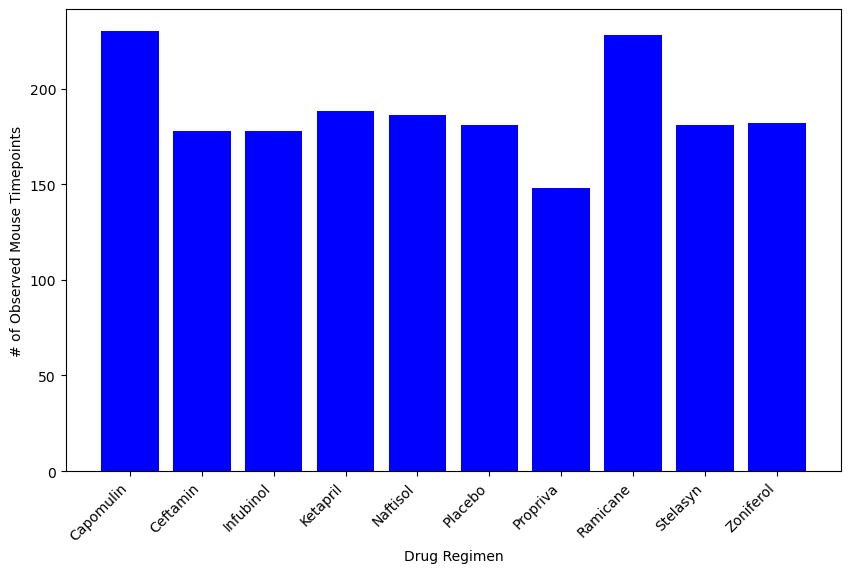

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_numbers.index, drug_regimen_numbers, color='blue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')
plt.show()

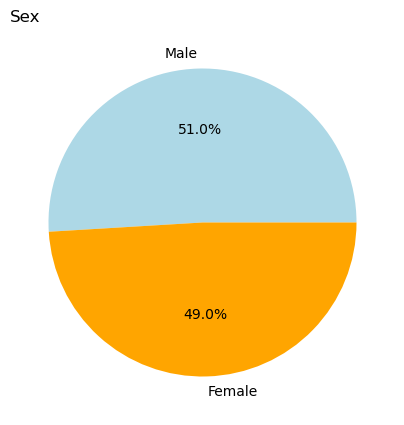

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Get the female versus male mice data
female_male_distribution = clean_no_duplicate_df['Sex'].value_counts()

# Generate the pie chart
female_male_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], figsize=(5, 5))
plt.title('Sex', loc='left')
plt.ylabel('')
plt.show()

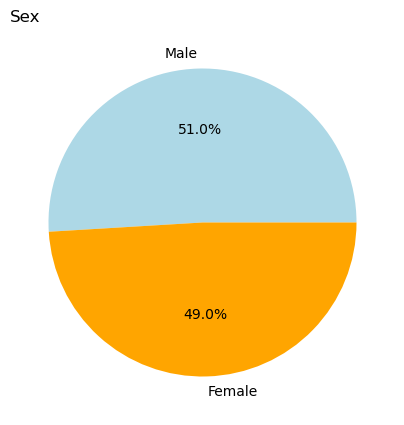

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(5, 5))
plt.pie(female_male_distribution, labels=female_male_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Sex', loc='left')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = clean_no_duplicate_df.groupby('Mouse ID')['Timepoint'].max()
last_greatest_timepoint

# Filter data for only the four treatment regimens
specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data_per_regimen = clean_no_duplicate_df[clean_no_duplicate_df['Drug Regimen'].isin(specific_regimens)]

# # Get the final tumor volume for each mouse at the last timepoint

final_tumor_volume = pd.merge(last_greatest_timepoint, clean_no_duplicate_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volume

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
list_of_treatments = clean_no_duplicate_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers
# Add subset
for treatment in specific_regimens:
    # Get tumor volume data for the current treatment
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'].tolist()
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    # Calculate quartiles and IQR
    quartiles = np.percentile(treatment_data, [25, 50, 75])
    lower_q, upper_q = quartiles[0], quartiles[2]
    iqr = upper_q - lower_q

    # Determine the bounds for potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    # Identify potential outliers
    outliers = [value for value in treatment_data if value < lower_bound or value > upper_bound]

    # Print results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


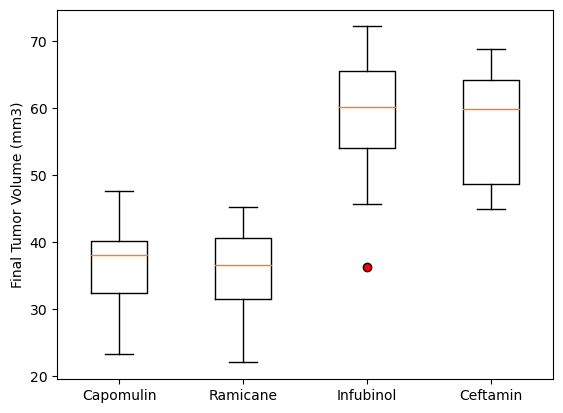

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, labels=specific_regimens, flierprops=dict(markerfacecolor='red', marker='o'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

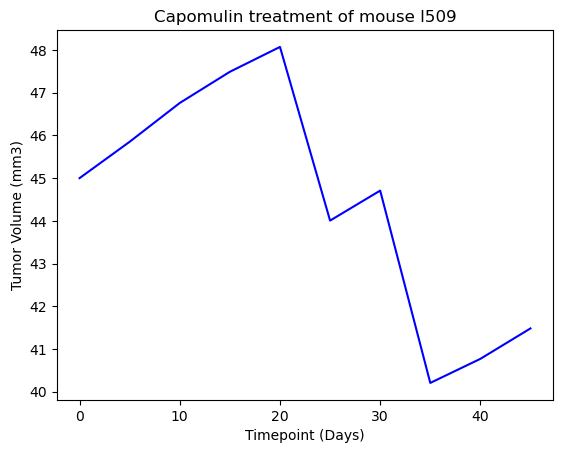

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter for Capomulin
capomulin_treatment = clean_no_duplicate_df[clean_no_duplicate_df['Drug Regimen'] == 'Capomulin']

# Select the mouse
selected_mouse_id = 'l509'
capomulin_mouse_info = capomulin_treatment[capomulin_treatment['Mouse ID'] == selected_mouse_id]
capomulin_mouse_info

# Create the line plot
plt.plot(capomulin_mouse_info['Timepoint'], capomulin_mouse_info['Tumor Volume (mm3)'], linestyle='-', color='b')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse_id}')
plt.show()

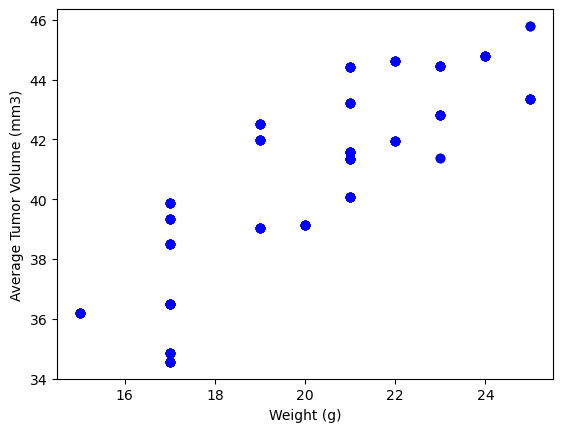

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Get average tumor volume 
average_tumor_volume = capomulin_treatment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with Capomulin data
capomulin_weight_average_tumor = pd.merge(capomulin_treatment, average_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Create the scatter plot
plt.scatter(capomulin_weight_average_tumor['Weight (g)'], capomulin_weight_average_tumor['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

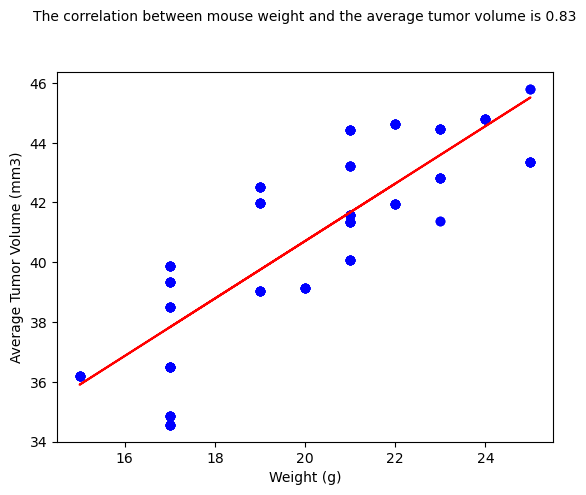

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight_data = capomulin_weight_average_tumor['Weight (g)']
tumor_volume_data = capomulin_weight_average_tumor['Tumor Volume (mm3)_average']

# Step 2: Calculate the correlation coefficient
correlation_coefficient = st.pearsonr(weight_data, tumor_volume_data)[0]

slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight_average_tumor['Weight (g)'], capomulin_weight_average_tumor['Tumor Volume (mm3)_average'])
plt.scatter(capomulin_weight_average_tumor['Weight (g)'], capomulin_weight_average_tumor['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', alpha=0.75)

# Create the linear regression line and chart
regress_values = slope * capomulin_weight_average_tumor['Weight (g)'] + intercept

plt.plot(capomulin_weight_average_tumor['Weight (g)'], regress_values, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation_comment = f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}'
plt.annotate(correlation_comment, xy=(0.5, 1.1), xytext=(0.5, 1.15), fontsize=10,
             ha='center', va='center', xycoords='axes fraction', textcoords='axes fraction')

plt.show